In [ ]:
!pip install rdkit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
!ls /content/drive/MyDrive/Datasets_MolBio
path_substruct='/content/drive/MyDrive/Datasets_MolBio/substruct_dataset.sdf'

grid_mols.sdf	 smi_dataset.csv  substruct_dataset.sdf
sdf_dataset.sdf  smi_dataset.smi


In [13]:
import os
from rdkit import Chem
from rdkit.Chem import Draw

In [12]:
#Load dataset
if os.path.exists(path_substruct):
  mols=Chem.SDMolSupplier(path_substruct)
  mols=[mol for mol in mols if mol]
  print(len(mols))
else:
  print("File not found")

50


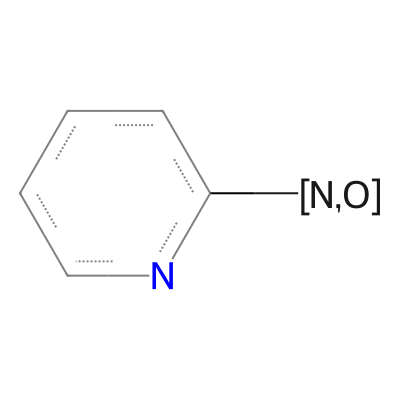

In [16]:
#Smarts for substruct
smarts='n1ccccc1-[N,O]'. # Pyridine ring attached to either a nitrogen or an oxygen by a single bond.
query_mol=Chem.MolFromSmarts(smarts) #rdkit molecule object
Draw.MolToImage(query_mol, size=(400,400))


In [17]:
#Substructure Matching
matched_molecules=[]
matched_molecules_atom_ids=[]
for mol in mols:
  at_ids=mol.GetSubstructMatch(query_mol) #->tuple of integers(atom IDs of every matched atoms)
  if at_ids:
    matched_molecules.append(mol)
    matched_molecules_atom_ids.append(at_ids)
print(f"Matched molecules: {len(matched_molecules)}")

Matched molecules: 6


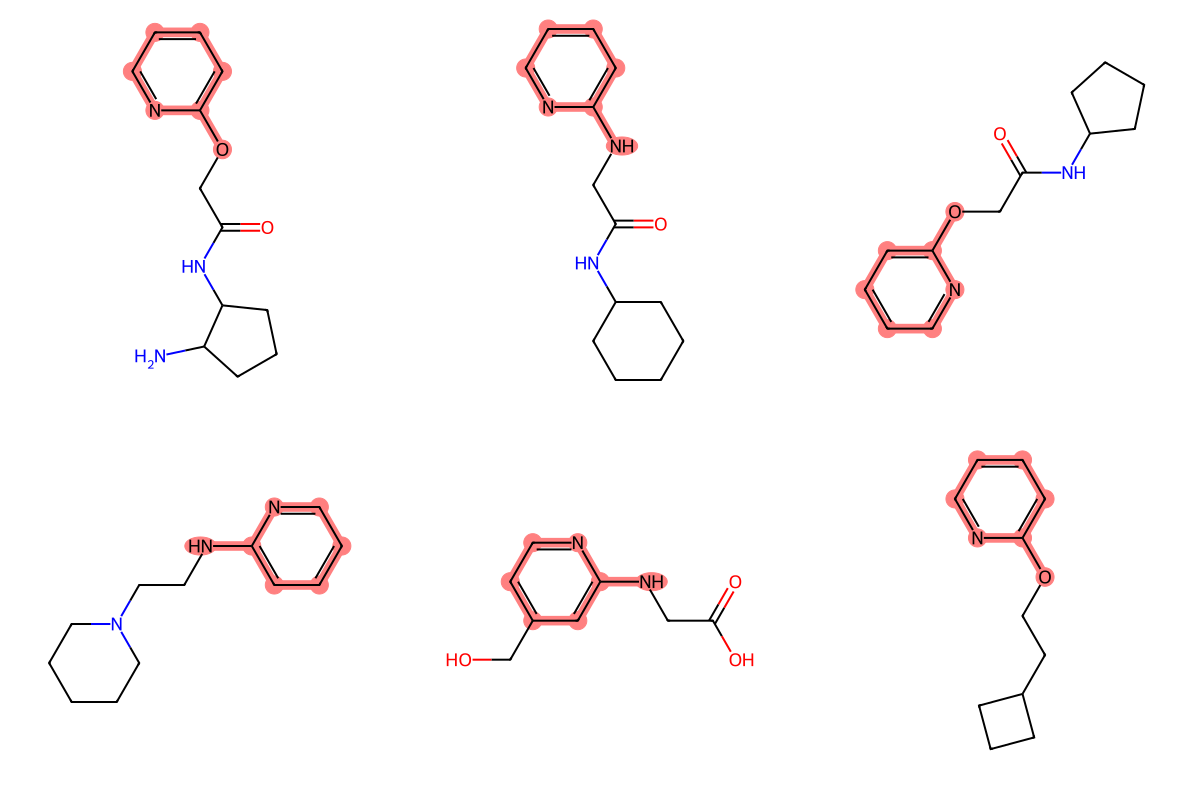

In [23]:
#Drawing the result of the computation
Draw.MolsToGridImage(matched_molecules, highlightAtomLists=matched_molecules_atom_ids, subImgSize=(400,400),)

In [24]:
#Export the result
with open("matched_molecules.sdf", "w") as f:
  writer=Chem.SDWriter(f)
  for mol in matched_molecules:
    if mol is not None:
      writer.write(mol)
  writer.close()

#simple way
# sdf_writer=Chem.SDWriter('matched_molecules.sdf')
# for mol in matched_molecules:
#   sdf_writer.write(mol)
# sdf_writer.close()